# Name:-Mahendra Singam

# The Spark Foundation

# Technical Task 2:-Perdiction using Unsupervised machine learning

# From given 'Iris' dataset,predict the optimum number of clusters and represent it visually.

# 1) We, first load the required libraries and dataset.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [9]:
iris=pd.read_csv("Iris.csv")

In [10]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# 2)Data Visualization

In [14]:
iris.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


# We can also see if there are any null values with help of heat map

<AxesSubplot:>

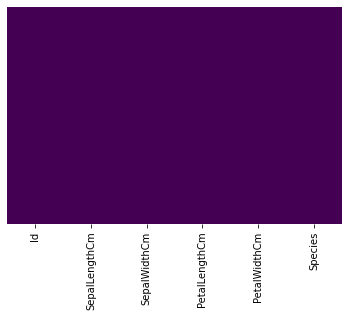

In [15]:
sns.heatmap(iris.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Visualizing the above correlation by creating a heat map

<AxesSubplot:>

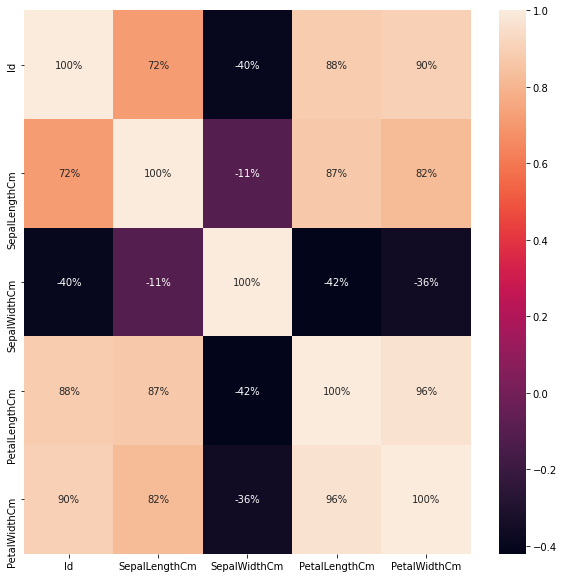

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(iris.corr(),annot=True,fmt='.0%')

Here,we can see that there is a strong positive correlation between PetalLength,PetalWidth and PetalLength,SepalLength and a negative correlation between SepalLength and SepalWidth.

Scatter plots to determine relation between
1)Sepal length Vs Sepal width
2)Petal length Vs Petal width

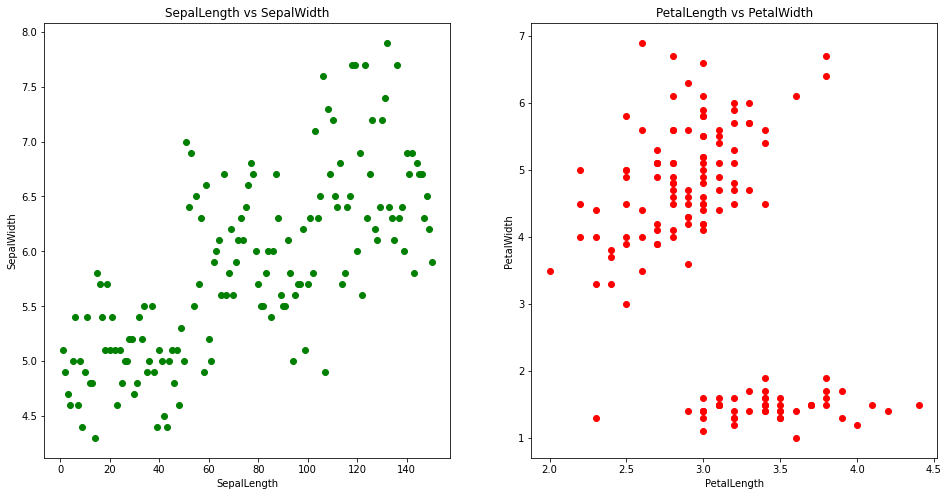

In [25]:
fig=plt.figure(figsize=(16,8))
plot1= fig.add_subplot(121)
plot2= fig.add_subplot(122)

plot1.scatter(iris.iloc[:,0],iris.iloc[:,1], c='green')
plot1.set_title("SepalLength vs SepalWidth")
plot1.set_xlabel("SepalLength")
plot1.set_ylabel("SepalWidth")

plot2.scatter(iris.iloc[:,2],iris.iloc[:,3], c='red')
plot2.set_title("PetalLength vs PetalWidth")
plot2.set_xlabel("PetalLength")
plot2.set_ylabel("PetalWidth")

plt.show()



Scatter plots to determine relation between
1)Sepal length Vs Petal length
2)Sepal width Vs Petal width

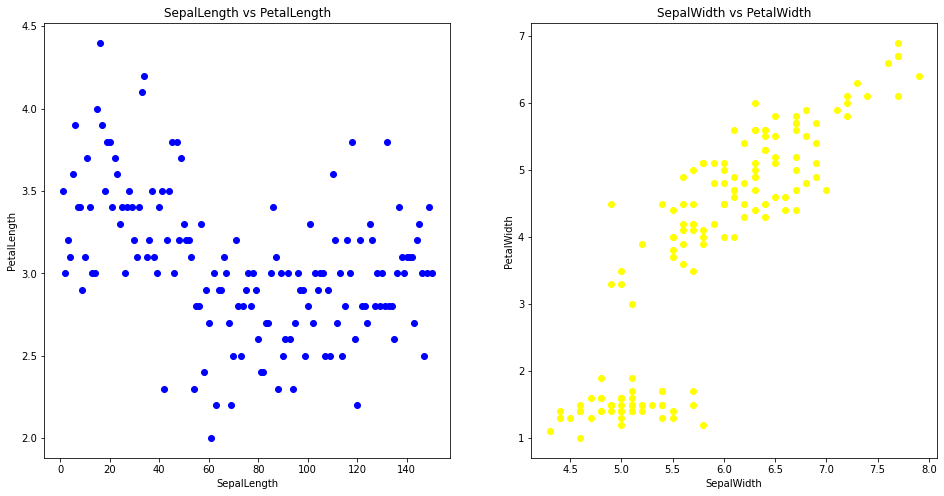

In [27]:
fig=plt.figure(figsize=(16,8),)
plot1= fig.add_subplot(121)
plot2= fig.add_subplot(122)

plot1.scatter(iris.iloc[:,0],iris.iloc[:,2], c='blue')
plot1.set_title("SepalLength vs PetalLength")
plot1.set_xlabel("SepalLength")
plot1.set_ylabel("PetalLength")

plot2.scatter(iris.iloc[:,1],iris.iloc[:,3], c='yellow')
plot2.set_title("SepalWidth vs PetalWidth")
plot2.set_xlabel("SepalWidth")
plot2.set_ylabel("PetalWidth")

plt.show()



# 3)Performing Kmeans Clustering Algorithm

In [28]:
#Creating a variable X
X=iris.iloc[:,[0,1,2,3,]].values


In [29]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    k=KMeans(n_clusters=i,init='k-means++', max_iter=300, random_state=101)
    k.fit(X)
    wcss.append(k.inertia_)

# Plotting the elbow plot

Elbow plot helps us to find the optimum number of clusters.

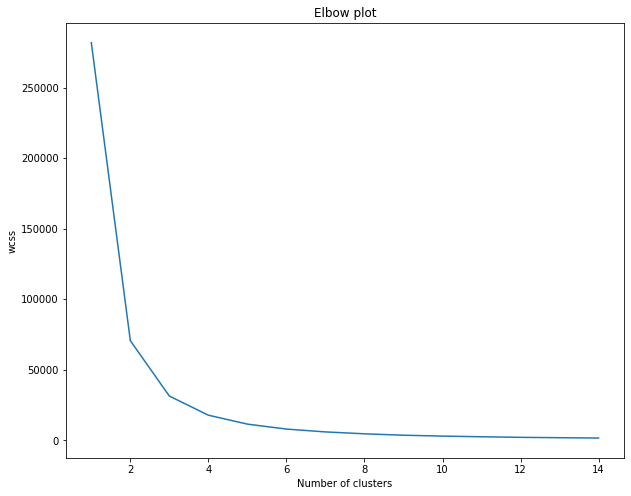

In [30]:
elbow=plt.figure(figsize=(10,8))
plt.plot(range(1,15),wcss,)
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

# Modelling

Applying KMeans to the dataset.

In [32]:
k= KMeans(n_clusters=3,init="k-means++", max_iter=300,n_init=10,random_state=101)
y_kmeans=k.fit_predict(X)

# Visualizing our Clusters

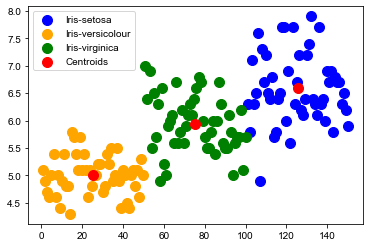

In [36]:
#Visualizing for the first two columns

plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],
           s=100,c='blue', label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],
           s=100,c='orange', label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],
           s=100,c='green', label='Iris-virginica')


#Plotting the centroinds of the clusters
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],
           s=100,c='red',label='Centroids')
plt.legend()

sns.set(rc={'figure.figsize':(5,5)})